## Trabajando con bases de datos sobre drogas

Desde el principio, este código fue una total aventura, realmente fue un reto para que la tabla en pandas quedara igual que la tabla en excel, pero al final lo logré.

Importando cosas importantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El siguiente código es para imprimir las tablas completas (No versión resumida)

In [2]:
# To print extended table
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000

Importando tabla de mi archivo excel 

**_Nota:_** Vea que primero se importan los datos de la tabla, sin columnas, esto debido a que las columnas de la tabla original requieren un tratamiento aparte que se realizará más adelante en el código.

In [3]:
# Importing table
data = pd.read_excel("drugs_table.xlsx", header=2)

En las siguientes líneas de código se realizará el tratamiento para que la tabla tenga sentido

Primero, transformaremos toda la información de la tabla a arreglos de numpy, esto debido a que necesitaremoos transponer, para que las columnas estén bien indexeadas

In [4]:
drugData = []
for column in data:
    drugData.append(list(data[column]))
drugData = np.array(drugData).T

Luego, se crean las columnas, esto realmente no se creó a mano, lo puse en un IDE y con la multiselección de palabras fue muy fácil, básicamente solo copiar y pegar

In [5]:
multi = [("Region or subregion","",""), ("Canabis", "Number (thousands)", "Best estimate"), ("Canabis", "Number (thousands)", "Lower"), ("Canabis", "Number (thousands)", "Upper")]
multi.extend([("Canabis", "Prevalence (percentage)", "Best estimate"), ("Canabis", "Prevalence (percentage)", "Lower"), ("Canabis", "Prevalence (percentage)", "Upper")])
multi.extend([("Opioids (opiates and prescription opioids)", "Number (thousands)", "Best estimate"), ("Opioids (opiates and prescription opioids)", "Number (thousands)", "Lower"), ("Opioids (opiates and prescription opioids)", "Number (thousands)", "Upper"), ("Opioids (opiates and prescription opioids)", "Prevalence (percentage)", "Best estimate"), ("Opioids (opiates and prescription opioids)", "Prevalence (percentage)", "Lower"), ("Opioids (opiates and prescription opioids)", "Prevalence (percentage)", "Upper")])
multi.extend([("Opiates", "Number (thousands)", "Best estimate"), ("Opiates", "Number (thousands)", "Lower"), ("Opiates", "Number (thousands)", "Upper"), ("Opiates", "Prevalence (percentage)", "Best estimate"), ("Opiates", "Prevalence (percentage)", "Lower"), ("Opiates", "Prevalence (percentage)", "Upper")])
multi.extend([("Cocaine", "Number (thousands)", "Best estimate"), ("Cocaine", "Number (thousands)", "Lower"), ("Cocaine", "Number (thousands)", "Upper"), ("Cocaine", "Prevalence (percentage)", "Best estimate"), ("Cocaine", "Prevalence (percentage)", "Lower"), ("Cocaine", "Prevalence (percentage)", "Upper")])
multi.extend([("Amphetamines and prescription stimulants", "Number (thousands)", "Best estimate"), ("Amphetamines and prescription stimulants", "Number (thousands)", "Lower"), ("Amphetamines and prescription stimulants", "Number (thousands)", "Upper"), ("Amphetamines and prescription stimulants", "Prevalence (percentage)", "Best estimate"), ("Amphetamines and prescription stimulants", "Prevalence (percentage)", "Lower"), ("Amphetamines and prescription stimulants", "Prevalence (percentage)", "Upper")])
multi.extend([("Ecstasy", "Number (thousands)", "Best estimate"), ("Ecstasy", "Number (thousands)", "Lower"), ("Ecstasy", "Number (thousands)", "Upper"), ("Ecstasy", "Prevalence (percentage)", "Best estimate"), ("Ecstasy", "Prevalence (percentage)", "Lower"), ("Ecstasy", "Prevalence (percentage)", "Upper")])

Ahora, se creará un dataFrame a partir de esos datos, junto con esas columnas

In [6]:
df = pd.DataFrame(drugData, columns=multi)
df

,"(Region or subregion, , )","(Canabis, Number (thousands), Best estimate)","(Canabis, Number (thousands), Lower)","(Canabis, Number (thousands), Upper)","(Canabis, Prevalence (percentage), Best estimate)","(Canabis, Prevalence (percentage), Lower)","(Canabis, Prevalence (percentage), Upper)","(Opioids (opiates and prescription opioids), Number (thousands), Best estimate)","(Opioids (opiates and prescription opioids), Number (thousands), Lower)","(Opioids (opiates and prescription opioids), Number (thousands), Upper)",...,"(Amphetamines and prescription stimulants, Number (thousands), Upper)","(Amphetamines and prescription stimulants, Prevalence (percentage), Best estimate)","(Amphetamines and prescription stimulants, Prevalence (percentage), Lower)","(Amphetamines and prescription stimulants, Prevalence (percentage), Upper)","(Ecstasy, Number (thousands), Best estimate)","(Ecstasy, Number (thousands), Lower)","(Ecstasy, Number (thousands), Upper)","(Ecstasy, Prevalence (percentage), Best estimate)","(Ecstasy, Prevalence (percentage), Lower)","(Ecstasy, Prevalence (percentage), Upper)"
0,Africa,44900000,35350000,62690000,6.419651135170872,5.053964921469847,8.963947523919426,6080000,5000000,7390000,...,6600000,0.5259006540703359,0.12868883327211011,0.9438136919159532,1800000,100000,7880000,0.2571750560545917,0.01406055307747932,1.1268848166818937
1,East Africa,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,North Africa,-,-,-,-,-,-,360000,120000,660000,...,610000,0.34138006547359556,0.23129978404160123,0.4212000310657815,-,-,-,-,-,-
3,Southern Africa,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,West and Central Africa,26760000,25700000,29420000,9.985986475726738,9.589059811189387,10.978727528494579,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Americas,56590000,55600000,58330000,8.439805341961197,8.291788376206352,8.698068017517107,13600000,11980000,16320000,...,9230000,1.172619792291037,0.9924552186842978,1.3759194475581344,3500000,3390000,3630000,0.5216529980137783,0.5053555951325813,0.5408505074212204
6,Caribbean,1040000,580000,2090000,3.609130353604251,2.019987959037364,7.245749829860824,-,-,-,...,700000,0.8720771350729288,0.05461092817775621,2.4226144829627008,60000,30000,100000,0.22514270881963971,0.09743279990820382,0.3634046220059903
7,Central America,880000,820000,990000,2.8844605774809713,2.6796987278760396,3.2516728264297146,-,-,-,...,100000,0.20840165548913964,0.08590153457876926,0.31433510360718203,50000,20000,100000,0.17262727648593731,0.0719381034312166,0.3288333393782131
8,North America,44630000,44460000,44810000,13.794760037459378,13.740091852982646,13.848471317459914,12830000,11640000,13720000,...,7690000,2.113830940412906,1.8501453702881594,2.3774278932043487,2870000,2870000,2870000,0.8860314656594048,0.8858440091126257,0.8861122265692581
9,South America,10040000,9740000,10440000,3.4899721292407655,3.387397395433613,3.6281980485322816,580000,250000,2180000,...,740000,0.2463462907116107,0.2178813958091652,0.25713902979100955,510000,470000,550000,0.1785363340268534,0.16424390044222206,0.19275686275270149


Para que al final, podamos hacer el Multi Index de una manera bonita chi cheñol

In [7]:
df.columns = pd.MultiIndex.from_tuples(df.columns)

Toques finales

In [8]:
df = df.set_index("Region or subregion")

**Note la diferencia entre la tabla anterior y esta:**

In [9]:
df = df.replace('-', 0)
df

Canabis                        \
                                     Number (thousands)                         
                                          Best estimate      Lower      Upper   
Region or subregion                                                             
Africa                                         44900000   35350000   62690000   
East Africa                                           0          0          0   
North Africa                                          0          0          0   
Southern Africa                                       0          0          0   
West and Central Africa                        26760000   25700000   29420000   
Americas                                       56590000   55600000   58330000   
Caribbean                                       1040000     580000    2090000   
Central America                                  880000     820000     990000   
North America                                  44630000   44460000   44810000   
South America                                  10040000    9740000   10440000   
Asia                                           54210000   41140000   64840000   
Central Asia and Transcaucasia                  1670000     640000    2410000   
East and South-East Asia                       13570000    4160000   21740000   
South-West Asia/Near and Middle East            9500000    6890000   11180000   
South Asia                                     29470000   29430000   29520000   
Europe                                         29490000   28810000   30210000   
Eastern and South-Eastern Europe                5880000    5530000    6220000   
Western and Central Europe                     23610000   23270000   23990000   
Oceania                                         2840000    2790000    2950000   
Australia and New Zealand                       2090000    2090000    2090000   
Melanesia                                             0          0          0   
Micronesia                                        60000      40000      80000   
Polynesia                                             0          0          0   
GLOBAL ESTIMATE                               188040000  163680000  219020000   

                                                              \
                                     Prevalence (percentage)   
                                               Best estimate   
Region or subregion                                            
Africa                                     6.419651135170872   
East Africa                                                0   
North Africa                                               0   
Southern Africa                                            0   
West and Central Africa                    9.985986475726738   
Americas                                   8.439805341961197   
Caribbean                                  3.609130353604251   
Central America                           2.8844605774809713   
North America                             13.794760037459378   
South America                             3.4899721292407655   
Asia                                      1.8089983949314372   
Central Asia and Transcaucasia            2.8782662253496496   
East and South-East Asia                  0.8455081171202926   
South-West Asia/Near and Middle East      3.1213459986713574   
South Asia                                 2.862398258510188   
Europe                                     5.424819000151508   
Eastern and South-Eastern Europe          2.6215793327177535   
Western and Central Europe                 7.396303939135746   
Oceania                                   10.894328197191319   
Australia and New Zealand                 10.981586086507917   
Melanesia                                                  0   
Micronesia                                17.168841641169152   
Polynesia                                                  0   
GLOBAL ESTIMATE                           3.8091011

**Las siguientes preguntas se contestaron a partir de la "mejor estimación" de las tablas, por continentes**

## ¿En qué continentes se usa más la "canabis"?

In [10]:
# El siguiente código es para aislar los continentes de los demás países en la tabla
canabisInfo = df.Canabis["Number (thousands)"]["Best estimate"]
cRate = []
cName = []
for index, country in enumerate(canabisInfo):
    if index % 5 == 0 or canabisInfo.index[index] == "Oceania":
        cRate.append(country)
        cName.append(canabisInfo.index[index])
cRate.pop()
cName.pop()

cRate = [int(i) for i in cRate] 

print(cName)
print(cRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[44900000, 56590000, 54210000, 29490000, 2840000]


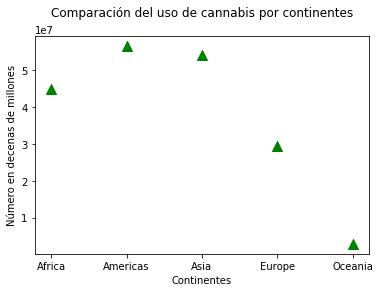

In [95]:
plt.scatter(cName, cRate, color="Green", marker="^", s=100)
plt.title("Comparación del uso de cannabis por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/CannabisPerContinent.png")
plt.show()

## ¿En qué continentes se usan más los "Opiodes"?

In [12]:
opioidInfo = df["Opioids (opiates and prescription opioids)"]["Number (thousands)"]["Best estimate"]
opRate = []
opName = []
for index, country in enumerate(opioidInfo):
    if index % 5 == 0 or opioidInfo.index[index] == "Oceania":
        opRate.append(country)
        opName.append(opioidInfo.index[index])
opRate.pop()
opName.pop()

opRate = [int(i) for i in opRate]

print(opName)
print(opRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[6080000, 13600000, 29460000, 3570000, 650000]


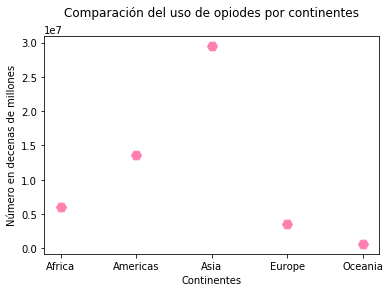

In [96]:
plt.scatter(opName, opRate, color="#ff80b0", marker="H", s=100)
plt.title("Comparación del uso de opiodes por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/OpioidsPerContinent.png")
plt.show()

## ¿En qué continentes se usan más los "narcóticos"?

In [14]:
opiatesInfo = df["Opiates"]["Number (thousands)"]["Best estimate"]
opiRate = []
opiName = []
for index, country in enumerate(opiatesInfo):
    if index % 5 == 0 or opioidInfo.index[index] == "Oceania":
        opiRate.append(country)
        opiName.append(opiatesInfo.index[index])
opiRate.pop()
opiName.pop()

opiRate = [int(i) for i in opiRate]

print(opiName)
print(opiRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[1470000, 2690000, 21730000, 3220000, 40000]


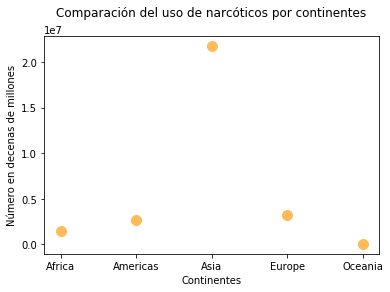

In [97]:
plt.scatter(opiName, opiRate, color="#ffba5a", marker="o", s=100)
plt.title("Comparación del uso de narcóticos por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/OpioitatesPerContinent.png")
plt.show()

## ¿En qué continentes se usan más cocaína?

In [16]:
cocaineInfo = df["Cocaine"]["Number (thousands)"]["Best estimate"]
coRate = []
coName = []
for index, country in enumerate(cocaineInfo):
    if index % 5 == 0 or cocaineInfo.index[index] == "Oceania":
        coRate.append(country)
        coName.append(opiatesInfo.index[index])
coRate.pop()
coName.pop()

coRate = [int(i) for i in coRate]

print(coName)
print(coRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[1300000, 9930000, 1670000, 4740000, 430000]


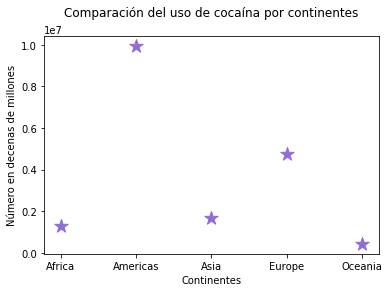

In [98]:
plt.scatter(coName, coRate, color="#916dd5", marker="*", s=200)
plt.title("Comparación del uso de cocaína por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/CocainePerContinent.png")
plt.show()

## ¿En qué continentes se usan más anfetaminas?

In [18]:
ampheInfo = df["Amphetamines and prescription stimulants"]["Number (thousands)"]["Best estimate"]
amRate = []
amName = []
for index, country in enumerate(ampheInfo):
    if index % 5 == 0 or ampheInfo.index[index] == "Oceania":
        amRate.append(country)
        amName.append(opiatesInfo.index[index])
amRate.pop()
amName.pop()

amRate = [int(i) for i in amRate]

print(amName)
print(amRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[3680000, 7860000, 14140000, 2900000, 350000]


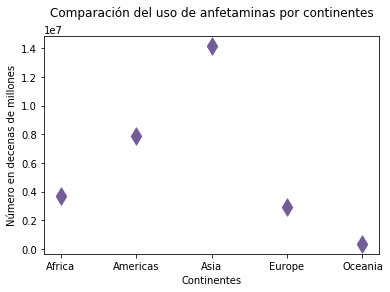

In [99]:
plt.scatter(amName, amRate, color="#745c97", marker="d", s=150)
plt.title("Comparación del uso de anfetaminas por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/AmphetaminesPerContinent.png")
plt.show()

## ¿En qué continentes se usan más el éxtasis?

In [20]:
ecstasyInfo = df["Ecstasy"]["Number (thousands)"]["Best estimate"]
exRate = []
exName = []
for index, country in enumerate(ecstasyInfo):
    if index % 5 == 0 or ecstasyInfo.index[index] == "Oceania":
        exRate.append(country)
        exName.append(ecstasyInfo.index[index])
exRate.pop()
exName.pop()

exRate = [int(i) for i in exRate]

print(exName)
print(exRate)

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
[1800000, 3500000, 11490000, 4060000, 440000]


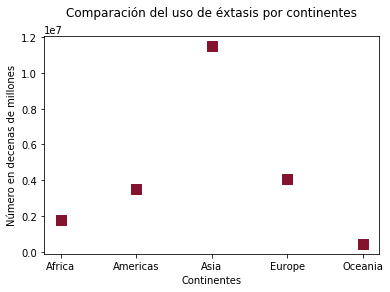

In [100]:
plt.scatter(exName, exRate, color="#84142d", marker="s", s=100)
plt.title("Comparación del uso de éxtasis por continentes", pad=20)
plt.ylabel("Número en decenas de millones")
plt.xlabel("Continentes")
plt.savefig("Activity2Graphs/EcstasyPerContinent.png")
plt.show()

## Si comparamos las 6 anteriores gráficas, podríamos observar interesantes.

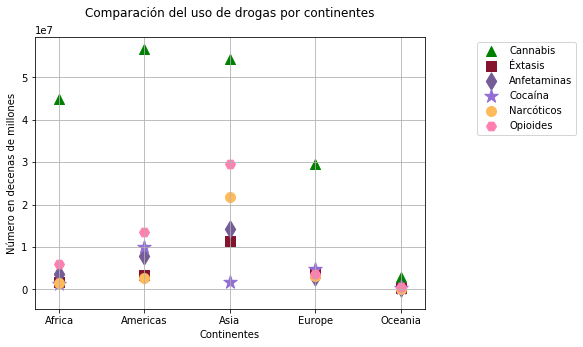

In [101]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(cName, cRate, color="Green", marker="^", s=100, label="Cannabis")
ax.scatter(exName, exRate, color="#84142d", marker="s", s=100, label="Éxtasis")
ax.scatter(amName, amRate, color="#745c97", marker="d", s=150, label="Anfetaminas")
ax.scatter(coName, coRate, color="#916dd5", marker="*", s=200, label="Cocaína")
ax.scatter(opiName, opiRate, color="#ffba5a", marker="o", s=100, label="Narcóticos")
ax.scatter(opName, opRate, color="#ff80b0", marker="H", s=100, label="Opioides")
ax.set_title("Comparación del uso de drogas por continentes", pad=20)
ax.set_ylabel("Número en decenas de millones")
ax.set_xlabel("Continentes")
ax.legend(bbox_to_anchor=(1, 0., 0.4, 1))
plt.grid()
plt.savefig("Activity2Graphs/DrugsPerContinent.png")
plt.show()

De esta última tabla, podemos observar varias cosas, contestando algunas preguntas que se nos pueden cruzar a la cabeza, y con algo de busqueda informativa, se pueden interpretar mejor los datos.

## **¿Cuál es la droga más utilizada en todos los continentes?**
Evidentemente aquí podemos observar como el Cannabis supera a todas las otras sustancias por mucho, esto muy probablemente, es debido a las legalizaciones en distintos lugares del planeta, note que en América su uso es superior a todos los demás, si vemos la tabla, en la parte de América, notaremos que Norte América tiene la más grande cifra, recordemos que en Canadá es Legal,  por no mencionar otros lugares.

## ¿Y la menos usada?

Aquí hay un par de candidatos, pero lo mejor, para no sesgar nuestra información, haremos un promedio.

In [23]:
cAvg = sum(cRate)/len(cRate)
opAvg = sum(opRate)/len(opRate)
opiAvg = sum(opiRate)/len(opRate)
coAvg = sum(coRate)/len(opRate)
amAvg = sum(amRate)/len(opRate)
exAvg = sum(exRate)/len(exRate)
drugNames = ["Cannabis", "Opiods", "Opiates", "Cocaine", "Amphetamines", "Ecstasy"]

In [24]:
print(cAvg)
print(opAvg)
print(opiAvg)
print(coAvg)
print(amAvg)
print(exAvg)
drugAvg = [cAvg, opAvg, opiAvg, coAvg, amAvg, exAvg]

37606000.0
10672000.0
5830000.0
3614000.0
5786000.0
4258000.0


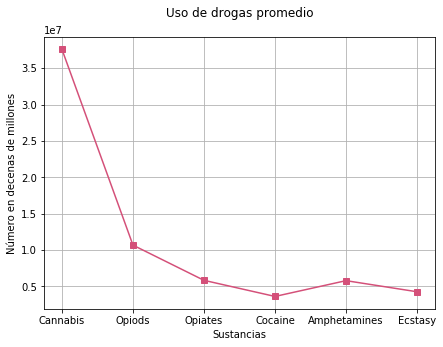

In [102]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(drugNames, drugAvg, color="#d45079", marker="s")
ax.set_title("Uso de drogas promedio", pad=20)
ax.set_ylabel("Número en decenas de millones")
ax.set_xlabel("Sustancias")
plt.grid()
plt.savefig("Activity2Graphs/DrugUseAvg.png")
plt.show()

Como vemos en el gráfico anterior, la droga menos usada (registrada) es la cocaína, le sigue el éxtasis. Y con este gráfico confirmamos que la Cannabis es la más usada del mundo

## ¿Cuál es el porcentaje de población de cada continente que usa estas drogas?

Lo siguiente se pretende contestar, primero investigando la población total por continente y luego haciendo una gráfica de pastel de cada uno.

## África

367000000
44900000


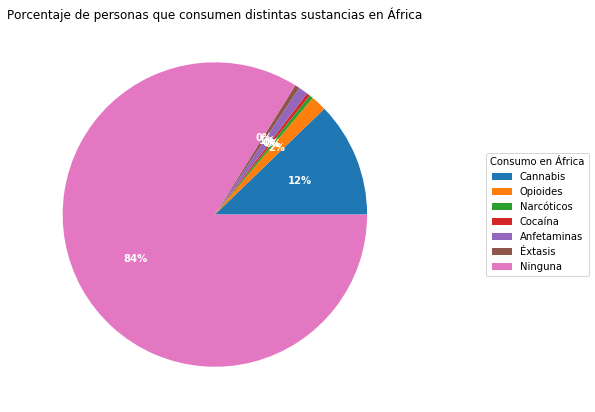

In [75]:
# Población en África, sumando las poblaciones del Norte, Sur y Oeste respectivamente.
africaPopulation =  367000000
print(africaPopulation)
print(cRate[0])
drugInAfrica = [cRate[0], opRate[0], opiRate[0], coRate[0], amRate[0], exRate[0]]
drugInAfrica.append(africaPopulation - sum(drugInAfrica))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ["Cannabis", "Opioides", "Narcóticos", "Cocaína", "Anfetaminas", "Éxtasis", "Ninguna"]

wedges, texts, autotexts = ax.pie(drugInAfrica,autopct='%1.00f%%', shadow=False, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Consumo en África",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=10)

ax.set_title("Porcentaje de personas que consumen distintas sustancias en África")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

## América

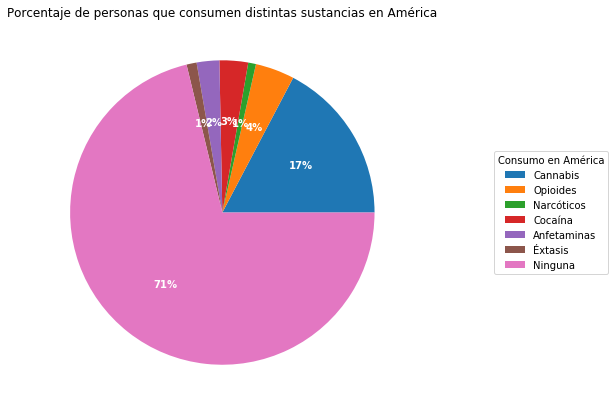

In [104]:
# Población en Amér## Américaca, sumando las poblaciones del Norte, Sur y Oeste respectivamente.
americaPopulation = 327200000
drugInAmerica = [cRate[1], opRate[1], opiRate[1], coRate[1], amRate[1], exRate[1]]
drugInAmerica.append(americaPopulation - sum(drugInAmerica))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ["Cannabis", "Opioides", "Narcóticos", "Cocaína", "Anfetaminas", "Éxtasis", "Ninguna"]

wedges, texts, autotexts = ax.pie(drugInAmerica,autopct='%1.00f%%', shadow=False, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Consumo en América",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=10)

ax.set_title("Porcentaje de personas que consumen distintas sustancias en América")
plt.setp(autotexts, size=10, weight="bold")
plt.savefig("Activity2Graphs/FailedPieGraph.png")
plt.show()

## Asia

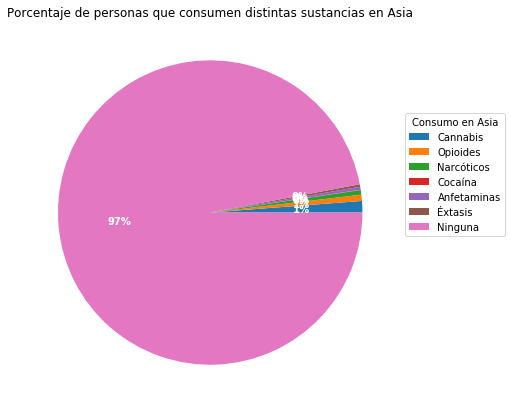

In [125]:
# Población en Asia, sumando las poblaciones del Norte, Sur y Oeste respectivamente.
asiaPopulation = 4463000000
drugInasia = [cRate[2], opRate[2], opiRate[2], coRate[2], amRate[2], exRate[2]]
drugInasia.append(asiaPopulation - sum(drugInasia))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ["Cannabis", "Opioides", "Narcóticos", "Cocaína", "Anfetaminas", "Éxtasis", "Ninguna"]

wedges, texts, autotexts = ax.pie(drugInasia,autopct='%1.00f%%', shadow=False, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Consumo en Asia",
          loc="center left",
          bbox_to_anchor=(1, 0.1, 0, 1), fontsize=10)

ax.set_title("Porcentaje de personas que consumen distintas sustancias en Asia")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

## Europe

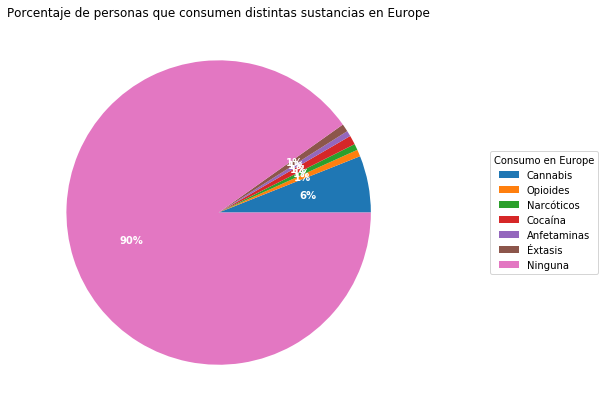

In [89]:
# Población en Europe, sumando las poblaciones del Norte, Sur y Oeste respectivamente.
EuropePopulation = 293167960+195921759
drugInEurope = [cRate[3], opRate[3], opiRate[3], coRate[3], amRate[3], exRate[3]]
drugInEurope.append(EuropePopulation - sum(drugInEurope))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ["Cannabis", "Opioides", "Narcóticos", "Cocaína", "Anfetaminas", "Éxtasis", "Ninguna"]

wedges, texts, autotexts = ax.pie(drugInEurope,autopct='%1.00f%%', shadow=False, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Consumo en Europe",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=10)

ax.set_title("Porcentaje de personas que consumen distintas sustancias en Europe")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

## Oceania

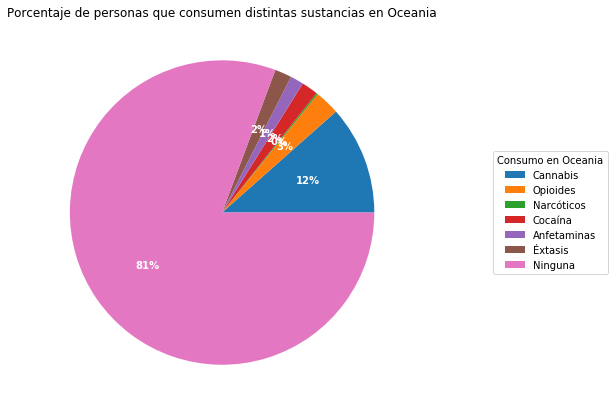

In [92]:
# Población en Oceania, sumando las poblaciones del Norte, Sur y Oeste respectivamente.
OceaniaPopulation = 24600000
drugInOceania = [cRate[4], opRate[4], opiRate[4], coRate[4], amRate[4], exRate[4]]
drugInOceania.append(OceaniaPopulation - sum(drugInOceania))

fig, ax = plt.subplots(figsize=(7, 7))
labels = ["Cannabis", "Opioides", "Narcóticos", "Cocaína", "Anfetaminas", "Éxtasis", "Ninguna"]

wedges, texts, autotexts = ax.pie(drugInOceania,autopct='%1.00f%%', shadow=False, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Consumo en Oceania",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=10)

ax.set_title("Porcentaje de personas que consumen distintas sustancias en Oceania")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

Note que estas últimas gráficas no son de confiar, ya que, debido a la falta de información en la tabla, no se puede hacer una gráfica completamente acertada o cercana a la realidad